<a href="https://colab.research.google.com/github/11daniel/HFStockAnalysis/blob/main/HFStockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from transformers import pipeline

# Load FinBERT model (finance-specific sentiment model)
sentiment = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# Example financial headline
headline = "Netflix Poised to Double Ad Revenue This Year, Wedbush Says"

print(sentiment(headline))
# [{'label': 'positive', 'score': 0.995}]


Device set to use cpu


[{'label': 'positive', 'score': 0.9478588700294495}]


/tmp/ipython-input-1774473699.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("NFLX", start="2025-01-01", end="2025-10-20", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price             Close       SMA_20       SMA_50 Signal
Ticker             NFLX                                 
Date                                                    
2025-10-13  1219.030029  1203.164001  1211.059995   SELL
2025-10-14  1215.349976  1203.906000  1211.947195   SELL
2025-10-15  1203.290039  1202.645502  1213.055596   SELL
2025-10-16  1183.589966  1201.435999  1213.157795   SELL
2025-10-17  1199.359985  1200.055499  1213.537595   SELL


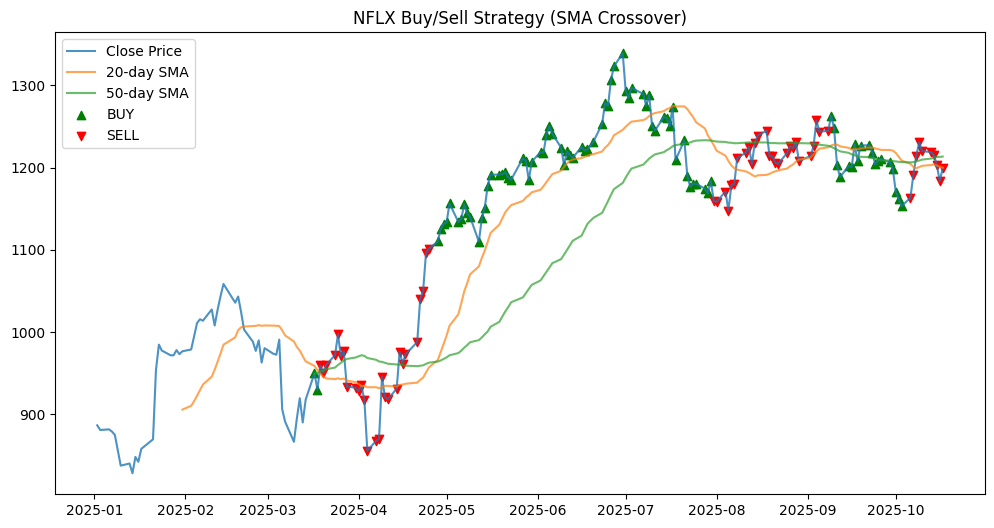

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download stock data
data = yf.download("NFLX", start="2025-01-01", end="2025-10-20", interval="1d")

# Calculate indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Generate signals safely (handles NaN)
data['Signal'] = np.where(
    data['SMA_20'] > data['SMA_50'], "BUY",
    np.where(data['SMA_20'] < data['SMA_50'], "SELL", "HOLD")
)

# Show last rows
print(data[['Close','SMA_20','SMA_50','Signal']].tail())

# Plot with buy/sell markers
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', alpha=0.8)
plt.plot(data['SMA_20'], label='20-day SMA', alpha=0.7)
plt.plot(data['SMA_50'], label='50-day SMA', alpha=0.7)

# Mark buy/sell
buy = data[data['Signal'] == 'BUY']
sell = data[data['Signal'] == 'SELL']
plt.scatter(buy.index, buy['Close'], marker='^', color='green', label='BUY', alpha=1)
plt.scatter(sell.index, sell['Close'], marker='v', color='red', label='SELL', alpha=1)

plt.title("NFLX Buy/Sell Strategy (SMA Crossover)")
plt.legend()
plt.show()


In [6]:
import numpy as np

def final_decision(sentiment_label, price_signal):
    if sentiment_label == "positive" and price_signal == "BUY":
        return "BUY"
    elif sentiment_label == "negative" and price_signal == "SELL":
        return "SELL"
    else:
        return "HOLD"

headline = "Netflix Poised to Double Ad Revenue This Year, Wedbush Says"
sentiment_result = sentiment(headline)[0]['label']   # positive/negative/neutral
latest_price_signal = data['Signal'].iloc[-1]        # from SMA crossover

print(final_decision(sentiment_result, latest_price_signal))


HOLD
